<img src='http://hilpisch.com/tpq_logo.png' width="300px" align="right">

# FPQ Bootcamp &mdash; Day 3

**Backtesting of Strategies**

## Financial Data

In [1]:
import numpy as np
import pandas as pd
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

In [2]:
raw = pd.read_csv('http://hilpisch.com/tr_eikon_eod_data.csv',
                 index_col=0, parse_dates=True)

In [3]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1972 entries, 2010-01-04 to 2017-10-31
Data columns (total 12 columns):
AAPL.O    1972 non-null float64
MSFT.O    1972 non-null float64
INTC.O    1972 non-null float64
AMZN.O    1972 non-null float64
GS.N      1972 non-null float64
SPY       1972 non-null float64
.SPX      1972 non-null float64
.VIX      1972 non-null float64
EUR=      1972 non-null float64
XAU=      1972 non-null float64
GDX       1972 non-null float64
GLD       1972 non-null float64
dtypes: float64(12)
memory usage: 200.3 KB


## SMA-based Trading Strategy

In [4]:
sym = 'AAPL.O'

In [5]:
data = pd.DataFrame(raw[sym])

In [6]:
data.head()

,AAPL.O
Date,
2010-01-04,30.572827
2010-01-05,30.625684
2010-01-06,30.138541
2010-01-07,30.082827
2010-01-08,30.282827


In [7]:
data['SMA1'] = data[sym].rolling(42).mean()
data['SMA2'] = data[sym].rolling(252).mean()

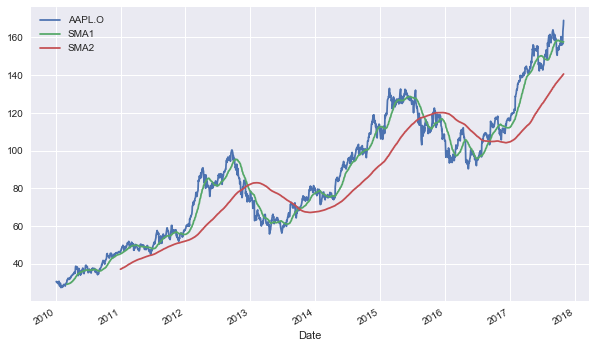

In [8]:
data.plot(figsize=(10, 6));

In [9]:
data.head()

,AAPL.O,SMA1,SMA2
Date,,,
2010-01-04,30.572827,NaN,NaN
2010-01-05,30.625684,NaN,NaN
2010-01-06,30.138541,NaN,NaN
2010-01-07,30.082827,NaN,NaN
2010-01-08,30.282827,NaN,NaN


In [10]:
data.dropna(inplace=True)

In [11]:
data.head()

,AAPL.O,SMA1,SMA2
Date,,,
2010-12-31,46.079954,45.280967,37.120735
2011-01-03,47.081381,45.349708,37.186246
2011-01-04,47.327096,45.412599,37.252521
2011-01-05,47.714238,45.466102,37.322266
2011-01-06,47.675667,45.522565,37.392079


In [12]:
# long only trading strategy
# data['Position'] = np.where(data['SMA1'] > data['SMA2'], 1, 0)

In [13]:
# long-short trading strategy
data['Position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)

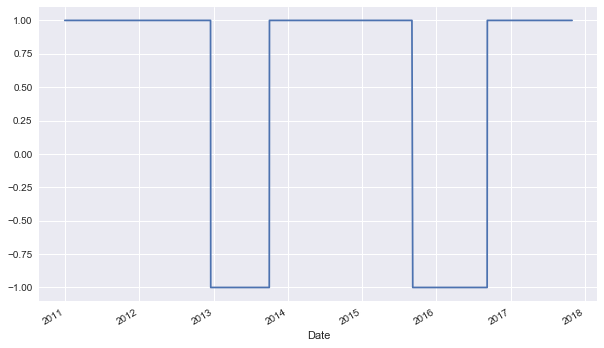

In [14]:
data['Position'].plot(figsize=(10, 6));

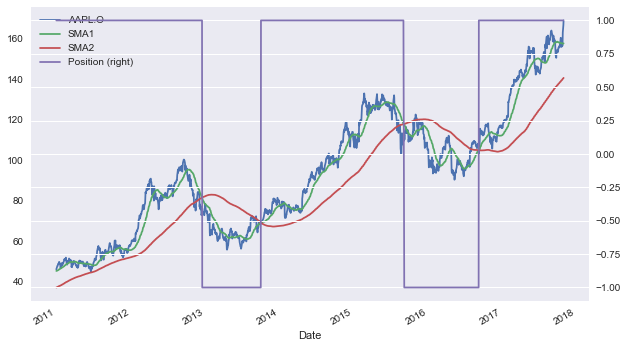

In [15]:
data.plot(figsize=(10, 6), secondary_y='Position');

In [16]:
data['Returns'] = np.log(data[sym] / data[sym].shift(1))

In [17]:
data.head()

,AAPL.O,SMA1,SMA2,Position,Returns
Date,,,,,
2010-12-31,46.079954,45.280967,37.120735,1,NaN
2011-01-03,47.081381,45.349708,37.186246,1,0.021500
2011-01-04,47.327096,45.412599,37.252521,1,0.005205
2011-01-05,47.714238,45.466102,37.322266,1,0.008147
2011-01-06,47.675667,45.522565,37.392079,1,-0.000809


In [18]:
data['Strategy'] = data['Position'].shift(1) * data['Returns']

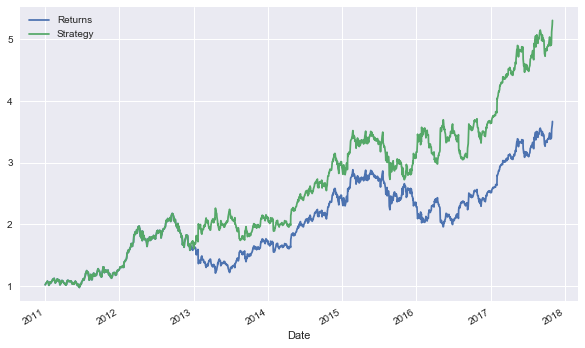

In [19]:
data[['Returns', 'Strategy']].dropna().cumsum(
            ).apply(np.exp).plot(figsize=(10, 6));

## Random Walk Hypothesis

In [20]:
lags = 5

In [21]:
cols = []
for lag in range(1, lags+1):
    col = 'lag_%d' % lag
    data[col] = data[sym].shift(lag)
    cols.append(col)

In [22]:
data.head(9)

,AAPL.O,SMA1,SMA2,Position,Returns,Strategy,lag_1,lag_2,lag_3,lag_4,lag_5
Date,,,,,,,,,,,
2010-12-31,46.079954,45.280967,37.120735,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-03,47.081381,45.349708,37.186246,1,0.021500,0.021500,46.079954,NaN,NaN,NaN,NaN
2011-01-04,47.327096,45.412599,37.252521,1,0.005205,0.005205,47.081381,46.079954,NaN,NaN,NaN
2011-01-05,47.714238,45.466102,37.322266,1,0.008147,0.008147,47.327096,47.081381,46.079954,NaN,NaN
2011-01-06,47.675667,45.522565,37.392079,1,-0.000809,-0.000809,47.714238,47.327096,47.081381,46.079954,NaN
2011-01-07,48.017095,45.582089,37.462453,1,0.007136,0.007136,47.675667,47.714238,47.327096,47.081381,46.079954
2011-01-10,48.922094,45.671800,37.537478,1,0.018672,0.018672,48.017095,47.675667,47.714238,47.327096,47.081381
2011-01-11,48.805665,45.752106,37.613397,1,-0.002383,-0.002383,48.922094,48.017095,47.675667,47.714238,47.327096
2011-01-12,49.202808,45.846544,37.689230,1,0.008104,0.008104,48.805665,48.922094,48.017095,47.675667,47.714238


In [23]:
data.dropna(inplace=True)

In [24]:
cols

['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']

In [25]:
reg = np.linalg.lstsq(data[cols], data[sym])[0]

In [26]:
pred = np.dot(data[cols], reg)

In [27]:
pred[:10]

array([ 47.70719727,  48.05020152,  48.97640036,  48.8014763 ,
        49.22375215,  49.43113911,  49.80624008,  48.66291941,
        48.45097492,  47.59071501])

In [28]:
data['Prediction'] = pred

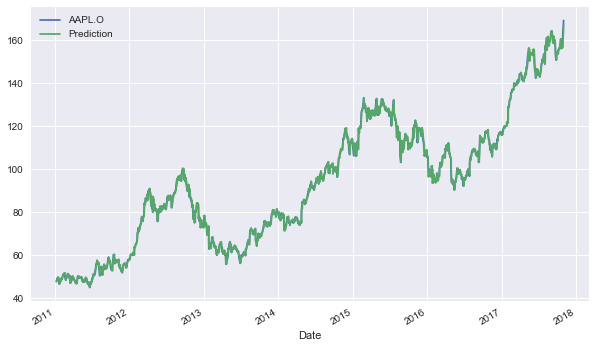

In [29]:
data[[sym, 'Prediction']].plot(figsize=(10, 6));

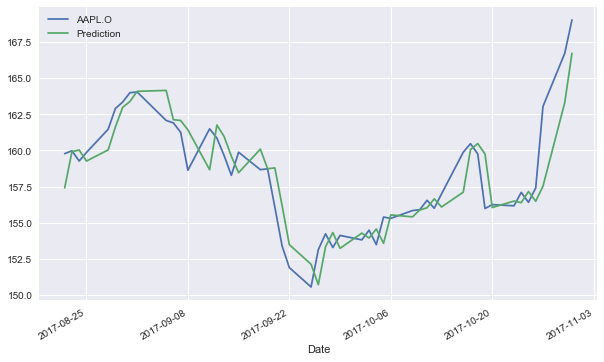

In [30]:
data[[sym, 'Prediction']].iloc[-50:].plot(figsize=(10, 6));

In [31]:
reg

array([ 1.02371   , -0.04833252, -0.00929219,  0.05219537, -0.01758613])

## Predicting Market Returns

In [32]:
data = pd.DataFrame(raw[sym])

In [33]:
data['Returns'] = np.log(data[sym] / data[sym].shift(1))

In [34]:
lags = 10

In [35]:
cols = []
for lag in range(1, lags+1):
    col = 'lag_%d' % lag
    data[col] = data['Returns'].shift(lag)
    cols.append(col)

In [36]:
data.head(7)

,AAPL.O,Returns,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10
Date,,,,,,,,,,,,
2010-01-04,30.572827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,30.625684,0.001727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,30.138541,-0.016034,0.001727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,30.082827,-0.001850,-0.016034,0.001727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,30.282827,0.006626,-0.001850,-0.016034,0.001727,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-11,30.015684,-0.008861,0.006626,-0.001850,-0.016034,0.001727,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-12,29.674256,-0.011440,-0.008861,0.006626,-0.001850,-0.016034,0.001727,NaN,NaN,NaN,NaN,NaN


In [37]:
data.dropna(inplace=True)

In [38]:
reg = np.linalg.lstsq(data[cols], data['Returns'])[0]

In [39]:
reg

array([ 0.03111127,  0.00334222, -0.04501275,  0.02606918, -0.02330581,
        0.00587711,  0.00423416, -0.0492475 ,  0.01206904,  0.02382406])

In [40]:
data['Prediction'] = np.dot(data[cols], reg)

In [41]:
data.head()

,AAPL.O,Returns,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,Prediction
Date,,,,,,,,,,,,,
2010-01-20,30.246398,-0.015536,0.043288,-0.016853,-0.005808,0.014007,-0.011440,-0.008861,0.006626,-0.001850,-0.016034,0.001727,0.002098
2010-01-21,29.724542,-0.017404,-0.015536,0.043288,-0.016853,-0.005808,0.014007,-0.011440,-0.008861,0.006626,-0.001850,-0.016034,-0.000893
2010-01-22,28.249972,-0.050881,-0.017404,-0.015536,0.043288,-0.016853,-0.005808,0.014007,-0.011440,-0.008861,0.006626,-0.001850,-0.002340
2010-01-25,29.010685,0.026572,-0.050881,-0.017404,-0.015536,0.043288,-0.016853,-0.005808,0.014007,-0.011440,-0.008861,0.006626,0.001219
2010-01-26,29.419971,0.014009,0.026572,-0.050881,-0.017404,-0.015536,0.043288,-0.016853,-0.005808,0.014007,-0.011440,-0.008861,-0.001136


In [42]:
data[['Returns', 'Prediction']].mean()

Returns       0.000870
Prediction   -0.000008
dtype: float64

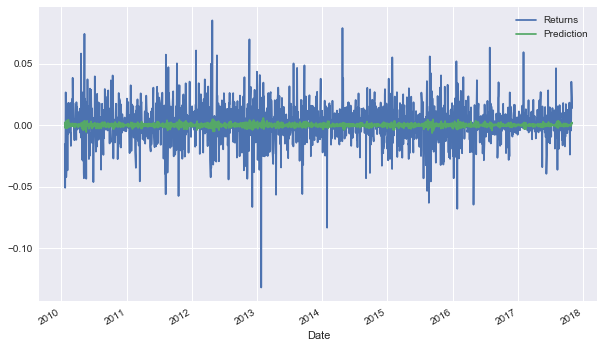

In [43]:
data[['Returns', 'Prediction']].plot(figsize=(10, 6));

In [44]:
np.sign(data['Returns'] * data['Prediction']).head(9)

Date
2010-01-20   -1.0
2010-01-21    1.0
2010-01-22    1.0
2010-01-25    1.0
2010-01-26   -1.0
2010-01-27    1.0
2010-01-28    1.0
2010-01-29    1.0
2010-02-01   -1.0
dtype: float64

In [45]:
np.sign(data['Returns'] * data['Prediction']).value_counts()

 1.0    1018
-1.0     941
 0.0       2
dtype: int64

In [46]:
data['Position'] = np.sign(data['Prediction'])

In [47]:
data['Strategy'] = data['Position'] * data['Returns']

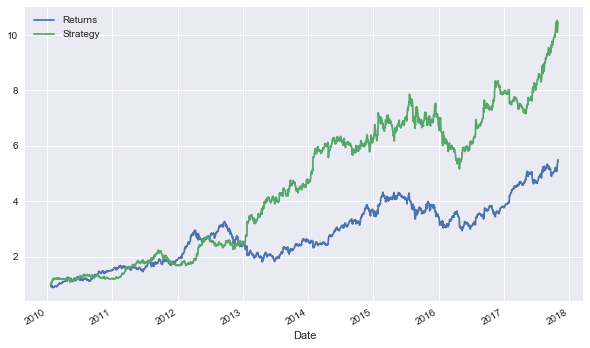

In [48]:
data[['Returns', 'Strategy']].dropna().cumsum(
                ).apply(np.exp).plot(figsize=(10, 6));

## Predicting Market Direction by OLS Regression

In [49]:
data = pd.DataFrame(raw[sym])

In [50]:
data['Returns'] = np.log(data[sym] / data[sym].shift(1))

In [51]:
lags = 10

In [52]:
cols = []
for lag in range(1, lags+1):
    col = 'lag_%d' % lag
    data[col] = data['Returns'].shift(lag)
    cols.append(col)

In [53]:
data.head(7)

,AAPL.O,Returns,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10
Date,,,,,,,,,,,,
2010-01-04,30.572827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,30.625684,0.001727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,30.138541,-0.016034,0.001727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,30.082827,-0.001850,-0.016034,0.001727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,30.282827,0.006626,-0.001850,-0.016034,0.001727,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-11,30.015684,-0.008861,0.006626,-0.001850,-0.016034,0.001727,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-12,29.674256,-0.011440,-0.008861,0.006626,-0.001850,-0.016034,0.001727,NaN,NaN,NaN,NaN,NaN


In [54]:
data.dropna(inplace=True)

In [55]:
reg = np.linalg.lstsq(np.sign(data[cols]), np.sign(data['Returns']))[0]

In [56]:
reg

array([ 0.00670948,  0.01403302, -0.01830729,  0.03852732,  0.01533263,
        0.0140773 ,  0.02070633, -0.02076601,  0.01890585,  0.01623588])

In [57]:
data['Prediction'] = np.dot(data[cols], reg)

In [58]:
data.head()

,AAPL.O,Returns,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,Prediction
Date,,,,,,,,,,,,,
2010-01-20,30.246398,-0.015536,0.043288,-0.016853,-0.005808,0.014007,-0.011440,-0.008861,0.006626,-0.001850,-0.016034,0.001727,0.000300
2010-01-21,29.724542,-0.017404,-0.015536,0.043288,-0.016853,-0.005808,0.014007,-0.011440,-0.008861,0.006626,-0.001850,-0.016034,0.000025
2010-01-22,28.249972,-0.050881,-0.017404,-0.015536,0.043288,-0.016853,-0.005808,0.014007,-0.011440,-0.008861,0.006626,-0.001850,-0.001626
2010-01-25,29.010685,0.026572,-0.050881,-0.017404,-0.015536,0.043288,-0.016853,-0.005808,0.014007,-0.011440,-0.008861,0.006626,0.001494
2010-01-26,29.419971,0.014009,0.026572,-0.050881,-0.017404,-0.015536,0.043288,-0.016853,-0.005808,0.014007,-0.011440,-0.008861,-0.001160


In [59]:
data[['Returns', 'Prediction']].mean()

Returns       0.00087
Prediction    0.00009
dtype: float64

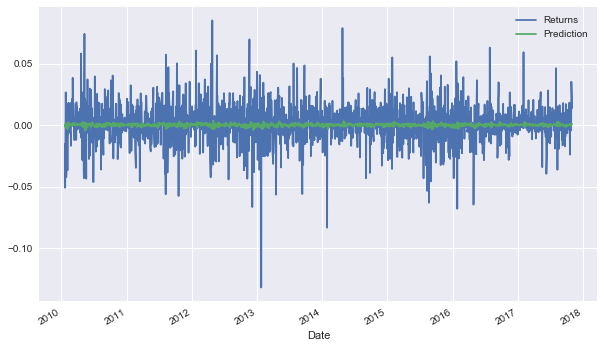

In [60]:
data[['Returns', 'Prediction']].plot(figsize=(10, 6));

In [61]:
np.sign(data['Returns'] * data['Prediction']).head(9)

Date
2010-01-20   -1.0
2010-01-21   -1.0
2010-01-22    1.0
2010-01-25    1.0
2010-01-26   -1.0
2010-01-27    1.0
2010-01-28    1.0
2010-01-29    1.0
2010-02-01   -1.0
dtype: float64

In [62]:
np.sign(data['Returns'] * data['Prediction']).value_counts()

 1.0    1042
-1.0     917
 0.0       2
dtype: int64

In [63]:
data['Position'] = np.sign(data['Prediction'])

In [64]:
data['Strategy'] = data['Position'] * data['Returns']

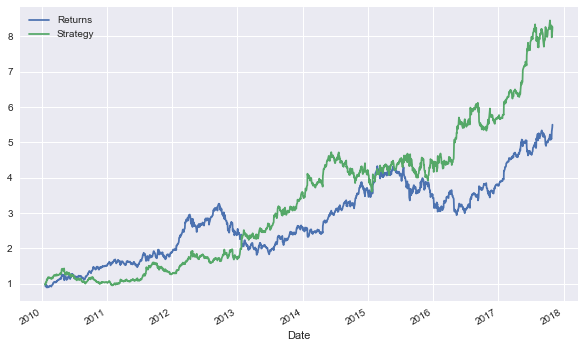

In [65]:
data[['Returns', 'Strategy']].dropna().cumsum(
                ).apply(np.exp).plot(figsize=(10, 6));

In [66]:
data[['Returns', 'Strategy']].std() * 252 ** 0.5

Returns     0.25467
Strategy    0.25447
dtype: float64

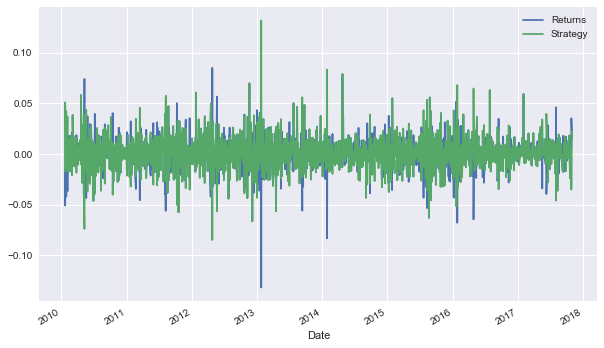

In [67]:
data[['Returns', 'Strategy']].plot(figsize=(10, 6));

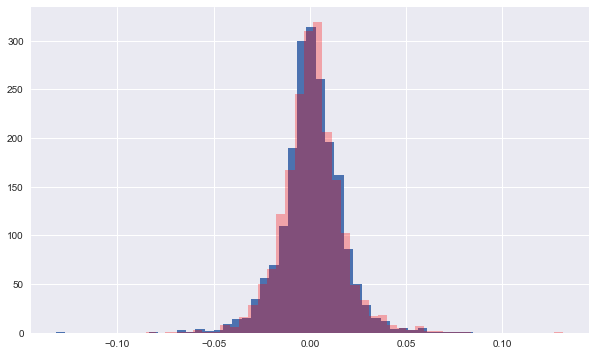

In [68]:
ax = data['Returns'].hist(bins=45, figsize=(10, 6))
data['Strategy'].hist(bins=45, ax=ax, alpha=0.3, color='r');

## Predicting Market Direction by Machine Learning

In [69]:
data = pd.DataFrame(raw[sym])

In [70]:
data['Returns'] = np.log(data[sym] / data[sym].shift(1))

In [71]:
lags = 5

In [72]:
cols = []
for lag in range(1, lags+1):
    col = 'lag_%d' % lag
    # data[col] = np.sign(data['Returns'].shift(lag))
    data[col] = np.where(data['Returns'].shift(lag) > 0, 1, 0)
    cols.append(col)

In [73]:
data.head(7)

,AAPL.O,Returns,lag_1,lag_2,lag_3,lag_4,lag_5
Date,,,,,,,
2010-01-04,30.572827,NaN,0,0,0,0,0
2010-01-05,30.625684,0.001727,0,0,0,0,0
2010-01-06,30.138541,-0.016034,1,0,0,0,0
2010-01-07,30.082827,-0.001850,0,1,0,0,0
2010-01-08,30.282827,0.006626,0,0,1,0,0
2010-01-11,30.015684,-0.008861,1,0,0,1,0
2010-01-12,29.674256,-0.011440,0,1,0,0,1


In [74]:
data.dropna(inplace=True)

In [75]:
from sklearn import linear_model

In [76]:
model = linear_model.LogisticRegression(C=100)

In [77]:
model.fit(data[cols], np.sign(data['Returns']))

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [78]:
data['Prediction'] = model.predict(data[cols])

In [79]:
data.head()

,AAPL.O,Returns,lag_1,lag_2,lag_3,lag_4,lag_5,Prediction
Date,,,,,,,,
2010-01-05,30.625684,0.001727,0,0,0,0,0,1.0
2010-01-06,30.138541,-0.016034,1,0,0,0,0,1.0
2010-01-07,30.082827,-0.001850,0,1,0,0,0,1.0
2010-01-08,30.282827,0.006626,0,0,1,0,0,-1.0
2010-01-11,30.015684,-0.008861,1,0,0,1,0,1.0


In [80]:
np.sign(data['Returns'] * data['Prediction']).value_counts()

 1.0    1058
-1.0     911
 0.0       2
dtype: int64

In [81]:
data['Strategy'] = data['Prediction'] * data['Returns']

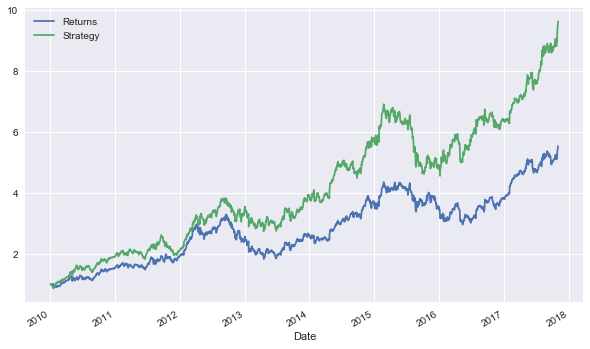

In [82]:
data[['Returns', 'Strategy']].dropna().cumsum(
                ).apply(np.exp).plot(figsize=(10, 6));

## Digitization of Features

In [83]:
data = pd.DataFrame(raw[sym])

In [84]:
data['Returns'] = np.log(data[sym] / data[sym].shift(1))

In [85]:
lags = 5

In [86]:
np.digitize(data['Returns'], bins=[-0.01, 0, 0.01])[:20]

array([3, 2, 0, 1, 2, 1, 0, 3, 1, 0, 3, 0, 0, 0, 3, 3, 2, 0, 0, 3])

In [87]:
mu = data['Returns'].mean()
std = data['Returns'].std()
mu, std

(0.00086759197334427293, 0.016047916326656784)

In [88]:
np.digitize(data['Returns'], bins=[mu - std, mu, mu + std])[:20]

array([3, 2, 0, 1, 2, 1, 1, 2, 1, 0, 3, 0, 0, 0, 3, 2, 2, 0, 0, 2])

In [89]:
cols = []
for lag in range(1, lags+1):
    col = 'lag_%d' % lag
    #data[col] = np.digitize(data['Returns'].shift(lag),
    #                        bins=[mu - std, mu, mu + std])
    data[col] = np.digitize(data['Returns'].shift(lag),
                            bins=[-0.01, 0, 0.01])
    cols.append(col)

In [90]:
data.dropna(inplace=True)

In [91]:
data.head(9)

,AAPL.O,Returns,lag_1,lag_2,lag_3,lag_4,lag_5
Date,,,,,,,
2010-01-05,30.625684,0.001727,3,3,3,3,3
2010-01-06,30.138541,-0.016034,2,3,3,3,3
2010-01-07,30.082827,-0.001850,0,2,3,3,3
2010-01-08,30.282827,0.006626,1,0,2,3,3
2010-01-11,30.015684,-0.008861,2,1,0,2,3
2010-01-12,29.674256,-0.011440,1,2,1,0,2
2010-01-13,30.092827,0.014007,0,1,2,1,0
2010-01-14,29.918542,-0.005808,3,0,1,2,1
2010-01-15,29.418542,-0.016853,1,3,0,1,2


In [92]:
# model = linear_model.LogisticRegression(C=100000)

In [93]:
from sklearn.svm import SVC

In [94]:
model = SVC()  # support vector machines

In [95]:
model.fit(data[cols], np.sign(data['Returns']))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [96]:
data['Prediction'] = model.predict(data[cols])

In [97]:
data.head()

,AAPL.O,Returns,lag_1,lag_2,lag_3,lag_4,lag_5,Prediction
Date,,,,,,,,
2010-01-05,30.625684,0.001727,3,3,3,3,3,1.0
2010-01-06,30.138541,-0.016034,2,3,3,3,3,1.0
2010-01-07,30.082827,-0.001850,0,2,3,3,3,1.0
2010-01-08,30.282827,0.006626,1,0,2,3,3,-1.0
2010-01-11,30.015684,-0.008861,2,1,0,2,3,1.0


In [98]:
np.sign(data['Returns'] * data['Prediction']).value_counts()

 1.0    1169
-1.0     800
 0.0       2
dtype: int64

In [99]:
data['Strategy'] = data['Prediction'] * data['Returns']

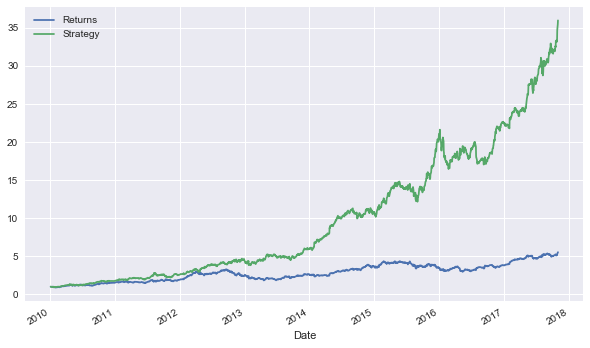

In [100]:
data[['Returns', 'Strategy']].dropna().cumsum(
                ).apply(np.exp).plot(figsize=(10, 6));

<img src='http://hilpisch.com/tpq_logo.png' width="300px" align="right">